# kdeplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

**Диаграмма KDE**

Диаграмма KDE (Kernel Density Estimate, ядерная оценка плотности) строит сглаженную оценку плотности вероятности для непрерывных данных. Это позволяет визуально оценить, как значения распределены по всему диапазону данных.

*Немного о вероятности и плотности вероятности*

Вероятность - степень (относительная мера, количественная оценка) возможности наступления некоторого события. Она выражается числом от 0 до 1, где 0 означает, что событие не произойдет вообще, а 1 означает, что оно произойдет наверняка. Вероятность используется для дискретных событий, которые можно посчитать (например, выпадение 5 на кубике).

Плотность вероятности используется для описания вероятностей непрерывных случайных величин - таких, которые могут принимать любые значения в каком-то диапазоне. Это не просто вероятность какого-то одного значения, а функция, которая показывает, насколько вероятны разные значения.

Для примера представьте, что вы измеряете рост взрослых людей. Рост может быть любым значением в некотором диапазоне, например, от 140 до 210 сантиметров. Плотность вероятности поможет понять, с какой частотой встречаются различные значения роста в этом диапазоне. Например, вы можете узнать, что рост от 160 до 170 сантиметров встречается чаще, чем от 190 до 200 сантиметров.

Таким образом, вероятность помогает нам понять шансы на определенные события, когда у нас есть конечное количество вариантов, а плотность вероятности нужна, когда возможные значения образуют непрерывный диапазон, и мы хотим понять, как распределены эти значения в этом диапазоне.

Диаграммы KDE в библиотеке seaborn строятся при помощи функции `sns.kdeplot()`.

Основные параметры функции `sns.kdeplot()`:
- `data`: DataFrame, массив с данными;
- `x`: имя переменной, которая будет отображена на оси X;
- `y`: имя переменной, которая будет отображена на оси Y. Если задан, строится 2D KDE;
- `hue`: имя переменной для группировки данных по категориям, каждая из которых будет представлена отдельной линией KDE;
- `weights`: массив значений для взвешивания точек данных. Должен быть такой же длины, как и данные;
- `palette`: палитра цветов для различения категорий, заданных параметром hue;
- `hue_order`: список для определения порядка категорий, отображаемых при использовании hue;
- `hue_norm`: два значения, определяющие нормализацию данных по оси hue;
- `color`: цвет линий и заливки, если hue не используется;
- `fill`: логическое значение, определяющее, следует ли заполнять область под KDE;
- `multiple`: определяет как отображать несколько KDE: 'layer', 'stack' или 'fill' (по умолчанию 'layer');
- `common_norm`: логическое значение, определяющее, нормализовать ли плотности по всем категориям hue вместе (True) или отдельно (False). По умолчанию common_norm=True;
- `common_grid`: логическое значение, определяющее, использовать ли общую сетку для всех категорий hue. По умолчанию common_grid=False;
- `cumulative`: логическое значение, определяющее, строить ли накопительную функцию распределения (по умолчанию cumulative=False);
- `bw_method`: метод для вычисления ширины окна (bandwidth): 'scott' (по умолчанию), 'silverman' или числовое значение;
- `bw_adjust`: множитель для ширины окна. Умножает значение, вычисленное bw_method, на этот коэффициент (по умолчанию bw_adjust=1);
- `log_scale`: Логическое значение или кортеж из двух логических значений для использования логарифмической шкалы по осям X и/или Y;
- `levels`: количество уровней контуров для 2D KDE (по умолчанию levels=10);
- `thresh`: минимальное значение плотности для отображения контуров в 2D KDE (по умолчанию thresh=0.05);
- `gridsize`: количество точек в сетке для оценки плотности (по умолчанию gridsize=200);
- `cut`: количество стандартных отклонений для увеличения границ осей при построении KDE (по умолчанию cut=3). Указывает, насколько далеко за пределы данных следует отображать кривую KDE;
- `clip`: пределы значений для обрезки KDE;
- `legend`: логическое значение, определяющее, отображать ли легенду (по умолчанию legend=True);
- `cbar`: логическое значение, определяющее, отображать ли цветовую шкалу (по умолчанию cbar=False).

Для демонстрации построения диаграммы KDE, из библиотеки seaborn загрузим встроенный датасет `'penguins'`, содержащий информацию о трёх видах пингвинов, обитающих на островах: Biscoe, Dream, Torgersen.

In [3]:
penguins = sns.load_dataset('penguins').dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Датафрейм содержит следующую информацию:
- `'species'` - вид пингвина (Adelie, Chinstrap, Gentoo);
- '`island'` - остров, где были собраны данные (Biscoe, Dream, Torgersen);
- `'bill_length_mm'` - длина клюва в миллиметрах;
- `'bill_depth_mm'` - глубина клюва в миллиметрах;
- `'flipper_length_mm'` - длина ласт в миллиметрах;
- `'body_mass_g'` - масса тела в граммах;
- `'sex'` - пол пингвина (Male, Female).

Перейдем к построению диаграммы KDE и для начала посмотрим на распределение веса пингвинов:

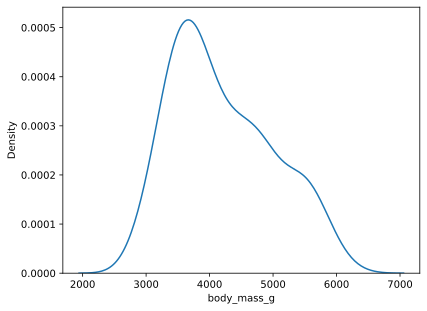

In [5]:
sns.kdeplot(penguins['body_mass_g'])
plt.show();

По оси `Y` автоматически отложилась плотность ядра *Density*. Чем выше плотность, тем больше значений данных находится вблизи этой точки.

**Параметр fill** 

Параметр `fill` управляет заливкой цветом под кривой KDE. 

Например:

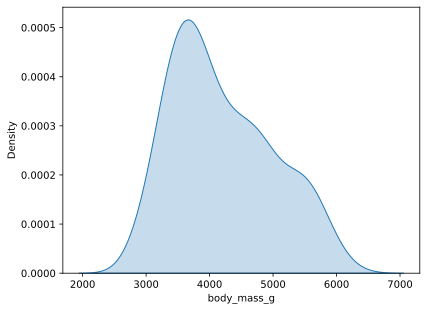

In [6]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True)
plt.show()

**Парамет linewidth**

Толщина линии регулируется параметром `linewidth`. Например, сделаем линию KDE потолще:

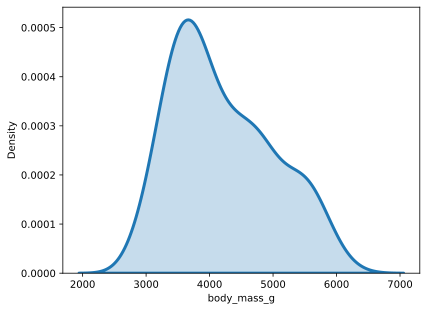

In [7]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            linewidth=3)
plt.show()

**Параметр color**

Для изменения цвета диаграммы используется параметр `color`. Например:

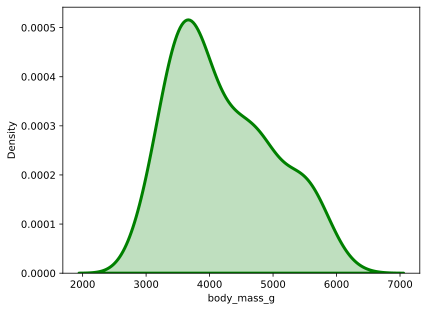

In [8]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            linewidth=3,
            color='green')
plt.show()

**Параметр clip**

Параметр `clip` задаёт диапазон значений, в котором будет вычисляться оценка плотности. Значения данных за пределами этого диапазона не будут учитываться в расчётах, что позволяет избежать неверных интерпретаций в областях, где данные отсутствуют или крайне редки.

Параметр `clip` принимает кортеж из двух чисел или двух кортежей (для двумерных данных), определяющий минимальное и максимальное значение для оси или осей.

Например, ограничим диапазон значений между 3000 и 5000 граммами:

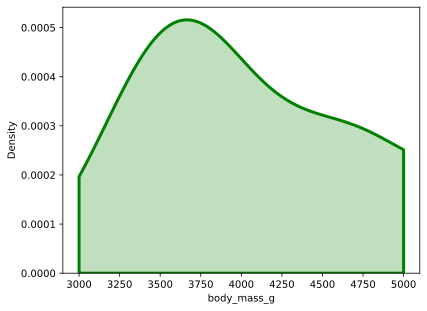

In [10]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            linewidth=3,
            color='green',
            clip=(3000, 5000))
plt.show();

**Параметр cut**

Параметр `cut` в функции `sns.kdeplot()` используется для управления тем, насколько далеко за пределы данных должна распространяться оценка плотности ядра. Этот параметр определяет, сколько ширин ядра следует добавлять по обе стороны от данных для расчёта плотности. По умолчанию параметр `cut` принимает значение `3`. Чем больше значение `cut`, тем дальше за пределы данных будет распространяться оценка плотности.

Если, например, `cut=0`, то оценка плотности будет строго ограничена данными:

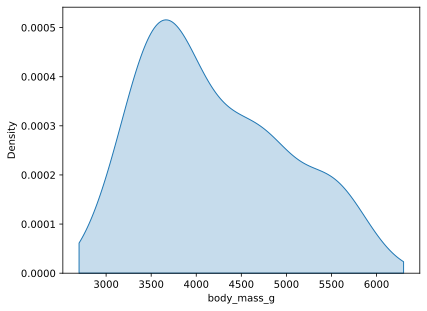

In [11]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            cut=0)
plt.show()

**Параметр log_scale**

Параметр `log_scale` позволяет построить график в логарифмическом масштабе. Этот параметр может пригодиться, когда данные имеют широкий диапазон значений или когда интересуют отношения между данными, а не абсолютные значения.

Пример использования:

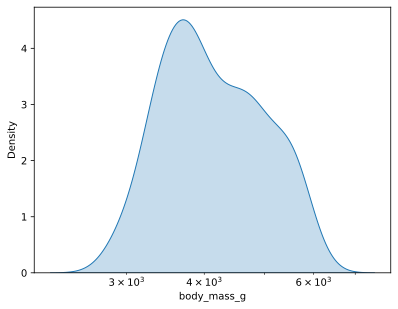

In [12]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            log_scale=True)
plt.show()

**Параметр cumulative**

Параметр `cumulative` функции `sns.kdeplot()` используется для построения накопительного графика оценки плотности ядра. Накопительный график KDE показывает накопленную вероятность.

Применим этот параметр:

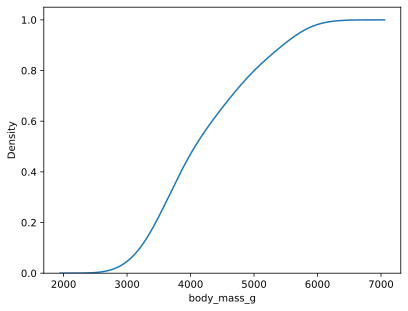

In [13]:
sns.kdeplot(data=penguins, x='body_mass_g',
            cumulative=True)
plt.show()

Накопительный KDE-график отображает накопленную плотность данных, где значение в любой точке на оси абсцисс показывает вероятность того, что случайная переменная меньше или равна этому значению

**Параметр bw_method**

Параметр `bw_method` функции `sns.kdeplot()` определяет метод выбора ширины полосы пропускания (bandwidth) для оценки плотности ядра. Ширина полосы пропускания контролирует сглаживание KDE-графика: узкая полоса приводит к более "шумному" графику, в то время как широкая полоса делает график более сглаженным.

Например, график с широкой полосой пропускания:

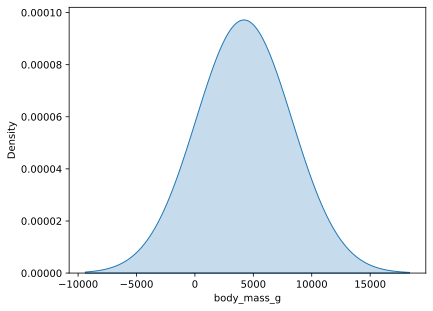

In [14]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            bw_method=5)
plt.show()

График с узкой полосой пропускания:

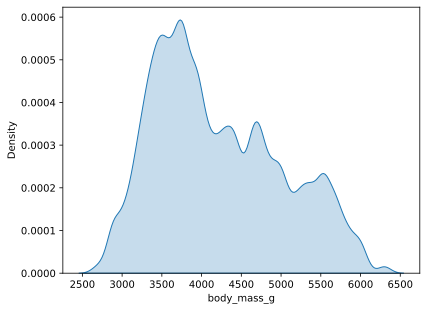

In [15]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            bw_method=0.1)
plt.show();

На этом графике видно, что дисперсия возросла.

**Параметр bw_adjust**

Параметр `bw_adjust` - это дополнительный множитель, который применяется к уже рассчитанной ширине полосы. Он позволяет более тонко настроить ширину полосы. Например, если параметру `bw_method` установлена ширина полосы `1`, а для `bw_adjust` присвоить значение `2`, то итоговая ширина станет `2`. Если поставить `bw_adjust=0.5`, то итоговая ширина станет `0.5`.

Пример использования:

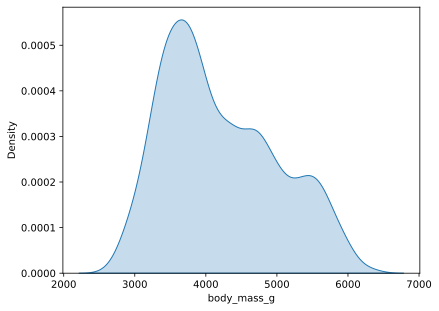

In [16]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            bw_method=0.1,
            bw_adjust=2)
plt.show()

**Параметр hue**

Параметр `hue` позволяет разделить данные на группы и нарисовать для каждой группы свой график плотности.

Посмотрим на распределение веса пингвинов в зависимости от вида:

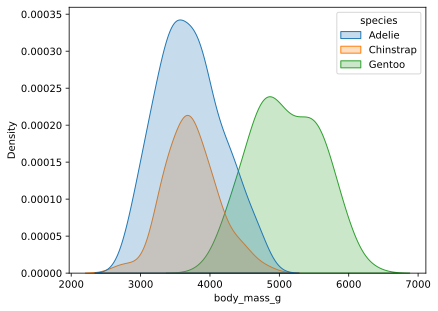

In [17]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            hue='species')
plt.show();

**Параметр multiple**

Параметр `multiple` функции `sns.kdeplot()` используется для настройки отображения нескольких оценок плотности на одном графике. Этот параметр может быть востребован, когда вы хотите сравнить распределения нескольких подвыборок данных.

Возможные значения параметра `multiple`:
- `'layer'` (по умолчанию): Это стандартное поведение, где каждая группа отображается своим собственным графиком поверх других.
- `'stack'`: Оценки плотности отображаются друг над другом, но складываются, чтобы показать совокупную плотность. Это похоже на стопку областей, где нижняя часть следующей оценки плотности начинается там, где заканчивается верхняя часть предыдущей.
- `'fill'`: Оценки плотности заполняются по вертикали, чтобы суммарная плотность на каждом уровне была равна 1, что может быть востребовано для визуализации относительных пропорций каждой группы в совокупном распределении.

Пример построения графика с использованием `multiple='stack'`:

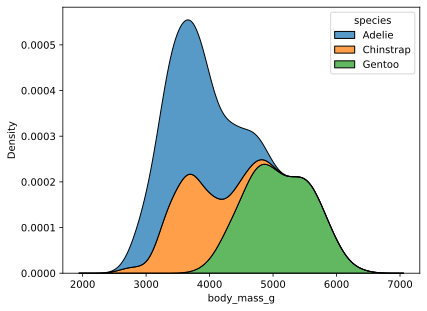

In [19]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            hue='species',
            multiple='stack')
plt.show();

График с `multiple='fill'`:

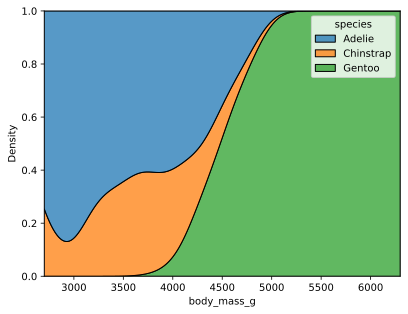

In [20]:
sns.kdeplot(data=penguins, x='body_mass_g',
            fill=True,
            hue='species',
            multiple='fill',
            cut=0)
plt.show()

Теперь построим двумерный график ядерной оценки плотности, в котором на оси `X` будут располагаться значения длины клюва пингвинов, а на оси `Y` - значения глубины клюва:

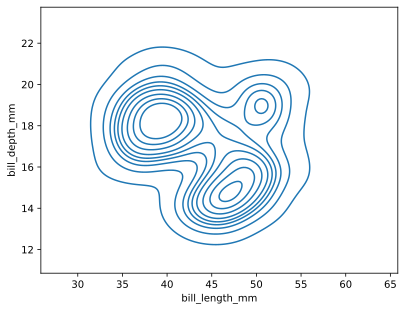

In [21]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show();

В итоге график KDE поменял свою форму, и теперь на нём отображены контурные линии (уровни плотности).

**Параметр levels**

Параметр `levels` функции `sns.kdeplot()` используется для управления количеством контурных линий (уровней плотности) на двумерных графиках оценки плотности ядра. Этот параметр определяет, сколько различных уровней плотности будет отображено на графике, что позволяет визуализировать структуру распределения данных более детально.

Параметр `levels` может принимать:
- **Целое число**: указывает количество уровней, которые будут равномерно распределены между минимальной и максимальной плотностью (по умолчанию `levels=10`).
- **Список или массив значений**: конкретные значения уровней плотности, которые будут использованы для построения контуров.

Например, увеличим количество отображаемых уровней до 15-ти:

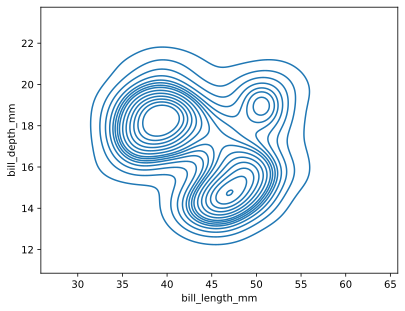

In [22]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
            levels=15)
plt.show()

Если указаны конкретные значения, контурные линии будут построены на этих уровнях плотности. Например:


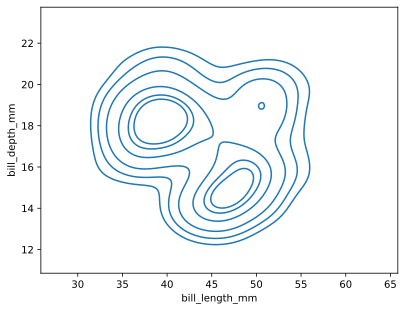

In [23]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
            levels=[0.05, 0.1, 0.2, 0.5, 0.7, 0.8])

plt.show();

В этом случае, векторный аргумент должен иметь возрастающие значения в диапазоне [0, 1]. Уровни соответствуют изопропорциям плотности: например, 80% вероятностной массы будет находиться за пределами контура, нарисованного для 0.8.

Параметром `fill` можно произвести заливку контурного KDE-графика. Например:

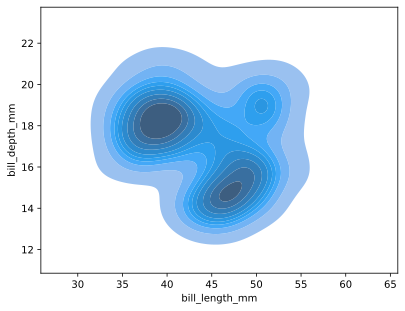

In [24]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
            fill=True)
plt.show()

**Параметр cbar**

Параметр `cbar` функции `sns.kdeplot()` используется для отображения цветовой шкалы (colorbar) на графике оценки плотности ядра. Цветовая шкала помогает интерпретировать значения плотности, отображаемые различными цветами на графике.

Для примера покажем цветовую шкалу на графике:

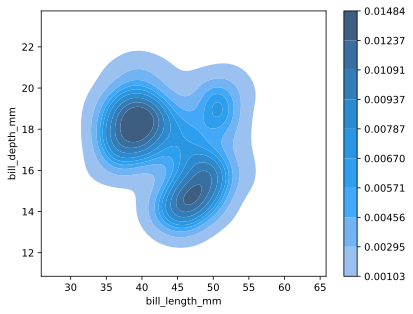

In [25]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
            fill=True,
            cbar=True)
plt.show()

Двумерные графики KDE возможно разбивать на категории с использованием параметра `hue`. Например, разделим данные на диаграмме по видам пингвинов:

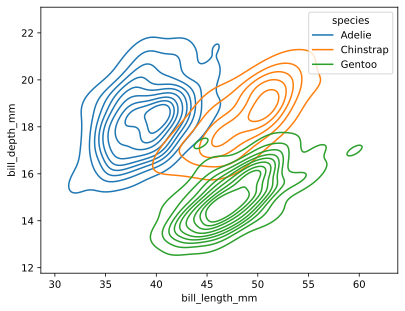

In [26]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
            hue='species')
plt.show()

Применим к графику заливку цветом:

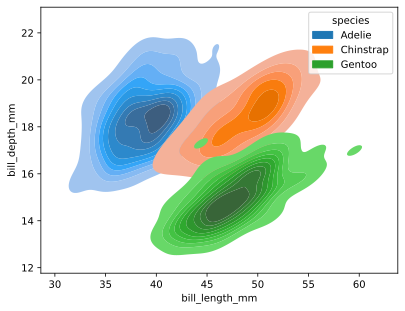

In [27]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
            hue='species',
            fill=True)
plt.show()

Параметром `palette` возможно менять цветовую гамму. Например:

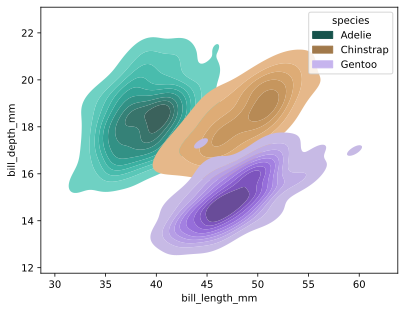

In [28]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
            hue='species',
            fill=True,
            palette='cubehelix')
plt.show()

**Параметр thresh**

Параметр `thresh` функции `sns.kdeplot()` используется для установки порогового значения плотности, ниже которого они не будут отображаться на графике. Этот параметр полезен для фильтрации шума и фокусировки на более значимых частях распределения. Параметр может принимать значения от 0 до 1.

Например, установим значение порога плотности на уровне 0.2:

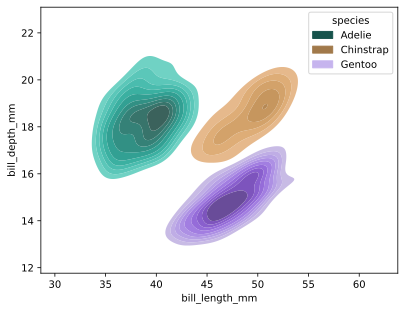

In [29]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
            hue='species',
            fill=True,
            palette='cubehelix',
            thresh=0.2)
plt.show()